In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from pandas.plotting import lag_plot
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("C:\DataScience\Assignment\Forecasting\Airlines+Data.csv", index_col='Month')
df

,Passengers
Month,
Jan-95,112
Feb-95,118
Mar-95,132
Apr-95,129
May-95,121
...,...
Aug-02,405
Sep-02,355
Oct-02,306


# Data Insights and Visualization

In [4]:
df.shape

(96, 1)

In [5]:
df.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96 entries, Jan-95 to Dec-02
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  96 non-null     int64
dtypes: int64(1)
memory usage: 1.5+ KB


In [7]:
df.isna().sum()

Passengers    0
dtype: int64

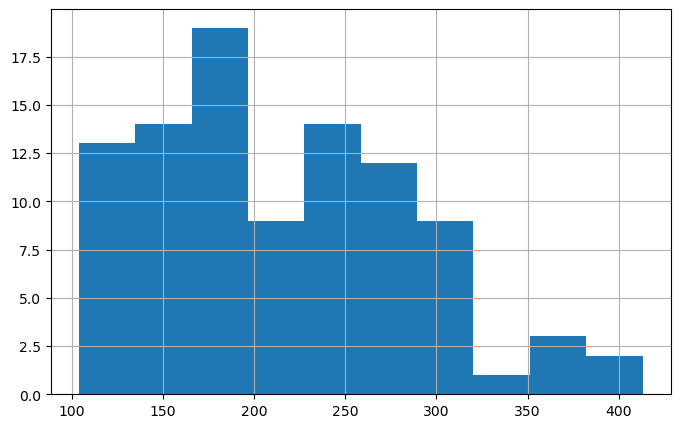

In [8]:
plt.axes()

df['Passengers'].hist(figsize = (8,5))

plt.show()

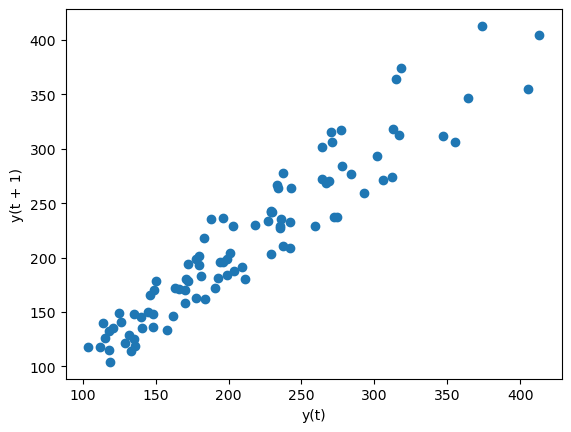

In [9]:
plt.axes()

lag_plot(df['Passengers'])

plt.show()

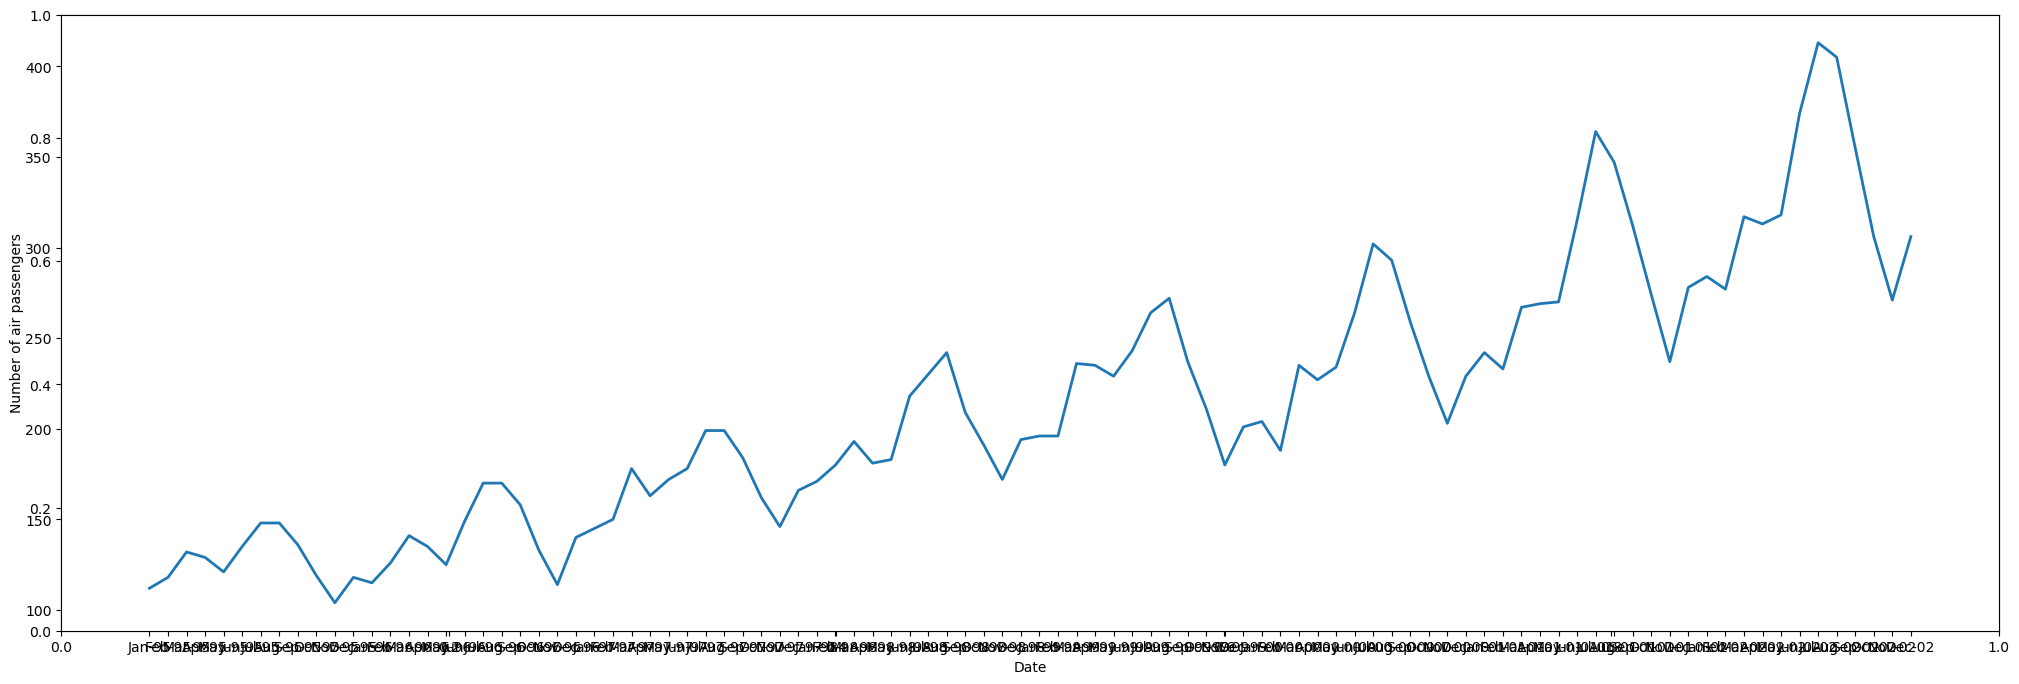

In [10]:
plt.figure(figsize = (25,8))

plt.xlabel("Date")
plt.ylabel("Number of air passengers")
plt.axes()

plt.plot(df['Passengers'], linewidth = 2)

plt.show()

<Axes: >

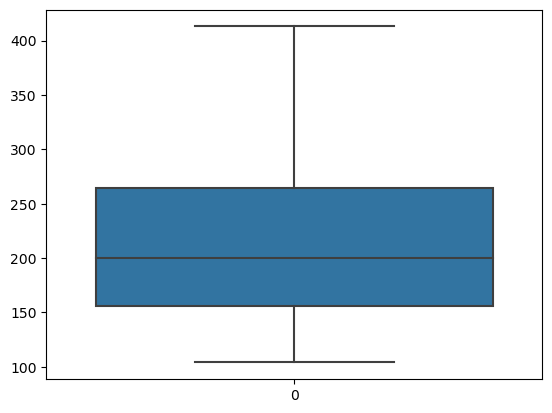

In [11]:
sns.boxplot(data=df['Passengers'])

In [12]:
import statsmodels.graphics.tsaplots as tsa_plots

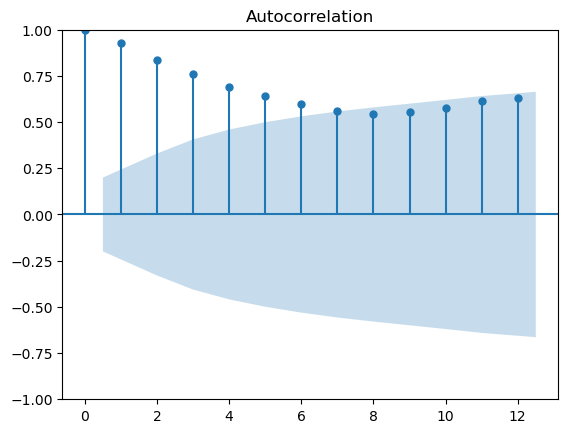

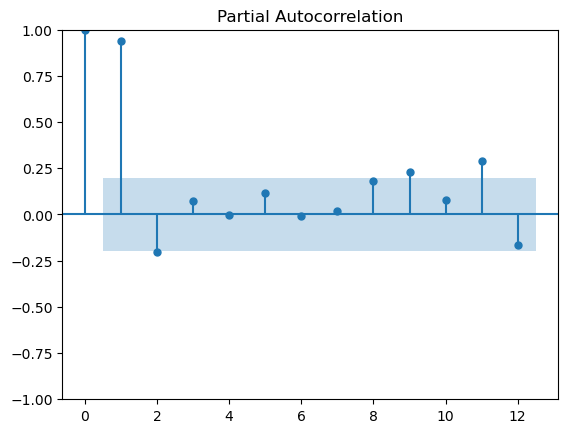

In [13]:
tsa_plots.plot_acf(df['Passengers'],lags = 12)

tsa_plots.plot_pacf(df['Passengers'],lags = 12)

plt.show()

# Time series decomposition plot

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

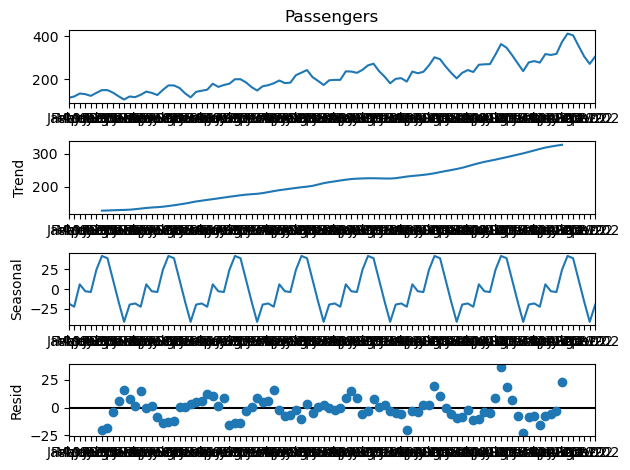

In [15]:
ts_decompose = seasonal_decompose(df.Passengers,period = 12)
ts_decompose.plot()
plt.show()

# Evaluation Metric RMS

In [16]:
def RMSE(org, pred):
    rmse = np.sqrt(np.mean((np.array(org)-np.array(pred))**2))
    return rmse

# Data Driven Forecasting Methods

In [17]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing 
from statsmodels.tsa.holtwinters import Holt 
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error

# Splitting the Data

In [18]:
train = df.head(80)
test = df.tail(16)

### Simple Exponential Method

In [19]:
simpexp = SimpleExpSmoothing(train['Passengers']).fit()
simpexp_pred = simpexp.predict(start=len(train), end=len(train)+len(test)-1)

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [20]:
simpexp_rsme = RMSE(test.Passengers, simpexp_pred)
print('RMSE value of Simple Exponential Method is', simpexp_rsme)

RMSE value of Simple Exponential Method is 57.46303173530479


# Holt Method

In [21]:
holt = Holt(train['Passengers']).fit()
holt_pred = holt.predict(start = len(train), end = len(train)+len(test)-1)

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [22]:
holt_rsme = RMSE(test.Passengers, holt_pred)
print('RMSE value of Holt Method is', holt_rsme)

RMSE value of Holt Method is 72.00352619638427


## Holts winter exponential smoothing with additive seasonality and additive trend

In [23]:
holt_add_add = ExponentialSmoothing(train["Passengers"], seasonal = "add", trend ="add", seasonal_periods = 4).fit()
pred_holt_add_add = holt_add_add.predict(start=len(train), end = len(train)+len(test)-1)

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [24]:
rmse_holt_add_add = RMSE(test.Passengers, pred_holt_add_add)
print('RMSe value of Holts add and add is :', rmse_holt_add_add)

RMSe value of Holts add and add is : 67.6973654814628


## Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [25]:
holt_mul_add = ExponentialSmoothing(train["Passengers"], seasonal = "mul", trend = "add", seasonal_periods = 4).fit()
pred_holt_mul_add = holt_mul_add.predict(start=len(train), end = len(train)+len(test)-1)

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [26]:
rmse_holt_mul_add = RMSE(test.Passengers, pred_holt_mul_add)
print('RMSE value of Holts mul and add is :', rmse_holt_mul_add)

RMSE value of Holts mul and add is : 65.19821564956045


## Model based Forecasting Methods

In [27]:
data = df.copy()
data

,Passengers
Month,
Jan-95,112
Feb-95,118
Mar-95,132
Apr-95,129
May-95,121
...,...
Aug-02,405
Sep-02,355
Oct-02,306


In [28]:
data['t'] = np.arange(1,97)
data['t_squared'] = data['t']*data['t']

data['log_psngr'] = np.log(data["Passengers"])
data

,Passengers,t,t_squared,log_psngr
Month,,,,
Jan-95,112,1,1,4.718499
Feb-95,118,2,4,4.770685
Mar-95,132,3,9,4.882802
Apr-95,129,4,16,4.859812
May-95,121,5,25,4.795791
...,...,...,...,...
Aug-02,405,92,8464,6.003887
Sep-02,355,93,8649,5.872118
Oct-02,306,94,8836,5.723585


## Splitting the Data

In [29]:
train = data.head(80)
test = data.tail(16)

## Linear Model

In [30]:
import statsmodels.formula.api as smf

In [31]:
linear = smf.ols('Passengers~t',data = train).fit()
pred_linear =  pd.Series(linear.predict(pd.DataFrame(test['t'])))

In [32]:
rmse_linear = RMSE(test['Passengers'], pred_linear)
print('RMSE Value of Linear is :',rmse_linear)

RMSE Value of Linear is : 47.54262406772677


## Exponential Model

In [33]:
exp = smf.ols('log_psngr~t',data = train).fit()
pred_exp =  pd.Series(exp.predict(pd.DataFrame(test['t'])))

In [34]:
rmse_exp = RMSE(test['Passengers'], pred_exp)
print('RMSE Value of Exponential is :',rmse_exp)

RMSE Value of Exponential is : 312.8892354482463


## Quadratic Model

In [35]:
quad = smf.ols('log_psngr~t+t_squared',data = train).fit()
pred_quad =  pd.Series(quad.predict(pd.DataFrame(test[['t',"t_squared"]])))

In [36]:
rmse_quad = RMSE(test['Passengers'], pred_quad)
print('RMSE Value of Quadratic is :',rmse_quad)

RMSE Value of Quadratic is : 312.90735978653686


# ARIMA Model

In [37]:
from statsmodels.tsa.arima.model import ARIMA

In [38]:
arima = ARIMA(train.Passengers, order=(2,1,2))
arima.fit()
print(arima.fit().summary())

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                   80
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -344.941
Date:                Mon, 21 Aug 2023   AIC                            699.883
Time:                        16:29:27   BIC                            711.730
Sample:                             0   HQIC                           704.629
                                 - 80                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5549      0.269      2.063      0.039       0.028       1.082
ar.L2          0.0188      0.321      0.058      0.953      -0.611       0.649
ma.L1         -0.3643      0.265     -1.376      0.1

In [39]:
pred_ARIMA=np.exp(pd.Series(test['Passengers']))
pred_ARIMA

Month
Sep-01    3.161392e+135
Oct-01    9.924029e+118
Nov-01    8.468222e+102
Dec-01    5.418336e+120
Jan-02    2.185913e+123
Feb-02    1.993295e+120
Mar-02    4.691922e+137
Apr-02    8.593555e+135
May-02    1.275397e+138
Jun-02    2.667695e+162
Jul-02    2.310048e+179
Aug-02    7.749348e+175
Sep-02    1.494655e+154
Oct-02    7.836307e+132
Nov-02    4.940883e+117
Dec-02    7.836307e+132
Name: Passengers, dtype: float64

In [40]:
data1 = {'Model':pd.Series(["rmse_linear","rmse_exp","rmse_quad","rmse_simpexp","rmse_holt","rmse_holt_add_add","rmse_holt_mul_add"]),
          'RMSE Values': pd.Series([rmse_linear,rmse_exp,rmse_quad,simpexp_rsme,holt_rsme,rmse_holt_add_add, rmse_holt_mul_add])          
        }
table_rmse=pd.DataFrame(data1)
table_rmse

,Model,RMSE Values
0,rmse_linear,47.542624
1,rmse_exp,312.889235
2,rmse_quad,312.907360
3,rmse_simpexp,57.463032
4,rmse_holt,72.003526
5,rmse_holt_add_add,67.697365
6,rmse_holt_mul_add,65.198216


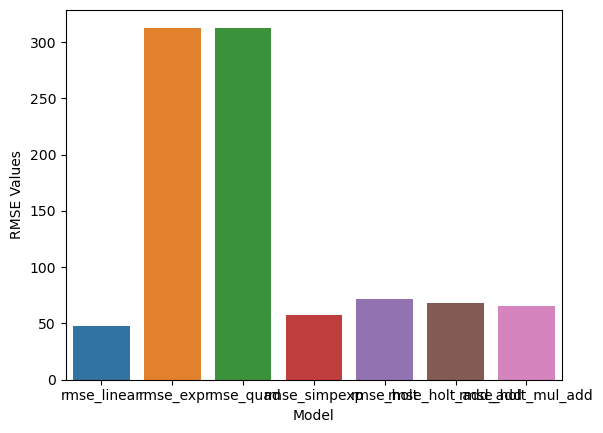

In [41]:
sns.barplot(data = table_rmse,x = 'Model',y = 'RMSE Values')
plt.show()

Linear model has the lowest RSME value. Hence, will be used for Final Model Building

In [42]:
final_model = smf.ols('Passengers~t',data = train).fit()
pred_linear =  pd.Series(final_model.predict(pd.DataFrame(test['t'])))

In [43]:
pred_linear

Month
Sep-01    281.560759
Oct-01    283.736334
Nov-01    285.911908
Dec-01    288.087482
Jan-02    290.263057
Feb-02    292.438631
Mar-02    294.614205
Apr-02    296.789780
May-02    298.965354
Jun-02    301.140928
Jul-02    303.316503
Aug-02    305.492077
Sep-02    307.667651
Oct-02    309.843226
Nov-02    312.018800
Dec-02    314.194374
dtype: float64

In [44]:
test['Actual Values'] = test.Passengers
test['Predicted Values'] = pred_linear

In [45]:
test.drop(columns=['t', 't_squared', 'log_psngr', 'Passengers'])

,Actual Values,Predicted Values
Month,,
Sep-01,312,281.560759
Oct-01,274,283.736334
Nov-01,237,285.911908
Dec-01,278,288.087482
Jan-02,284,290.263057
Feb-02,277,292.438631
Mar-02,317,294.614205
Apr-02,313,296.789780
May-02,318,298.965354


## End